In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [123]:
data = np.genfromtxt('./Admission_Predict.csv', delimiter=',', skip_header=1)
X_train = np.array(data[:,1:7])
y_train= np.array(data[:,8])

In [124]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[50.   28.    4.    4.    4.    3.12]
Peak to Peak range by column in Normalized X:[4.36327014 4.61899697 3.50171452 3.97768808 4.45755089 5.23866806]


In [125]:
iters=400
sgdr = SGDRegressor(max_iter=iters, eta0=0.005)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(eta0=0.005, max_iter=400)
number of iterations completed: 12, number of weight updates: 4801.0


In [126]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [0.02921708 0.02628634 0.01332918 0.00455935 0.0180336  0.04823563], b:[0.70883794]


In [127]:
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"Prediction on training set:\n{y_pred_sgd[:4]}" )
print(f"Target values \n{y_train[:4]}")

Prediction on training set:
[0.9280562  0.78177195 0.64160505 0.71935491]
Target values 
[0.92 0.76 0.72 0.8 ]


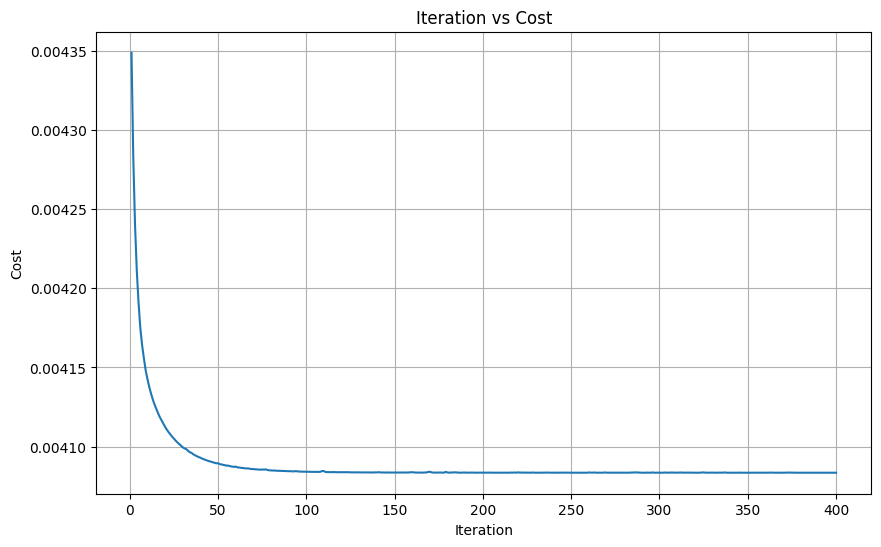

In [128]:
cost_history = []
for _ in range(iters):  # assuming 100 iterations
    sgdr.partial_fit(X_norm, y_train)  # fit one epoch at a time
    y_pred = sgdr.predict(X_norm)
    cost = mean_squared_error(y_train, y_pred)
    cost_history.append(cost)

# Plot iteration vs cost
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cost_history) + 1), cost_history)
plt.title('Iteration vs Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

(3, 3)


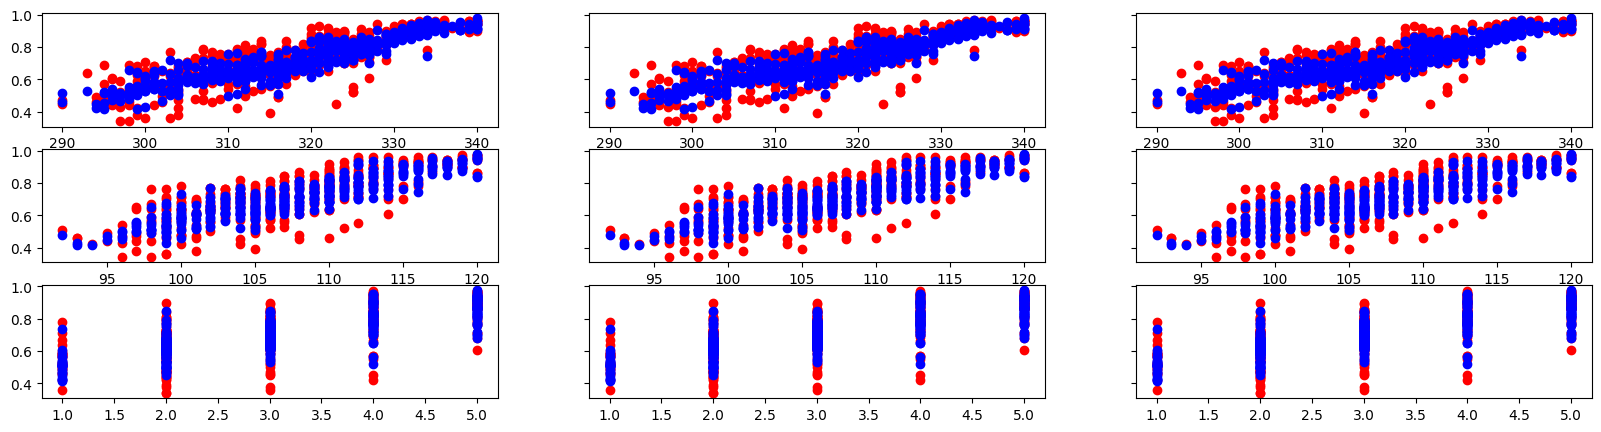

In [129]:
fig,ax=plt.subplots(3,3,figsize=(20,5),sharey=True)
print(ax.shape)
for i in range(ax.shape[1]):
    for j in range(ax.shape[0]):
        ax[i,j].scatter(X_train[:,i],y_train, label = 'target', c='r')
        # ax[i].set_xlabel(X_features[i])
        ax[i,j].scatter(X_train[:,i],y_pred_sgd,c='b', label = 'predict')
# ax[0].set_ylabel("Price"); ax[0].legend();
# fig.suptitle("target versus prediction using z-score normalized model")
plt.show()